**Assignment 9:** Optimizer Comparison (SGD vs Adam).

*Explanation:* Compare model convergence speed and stability using different optimizers.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with SGD optimizer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training with Adam optimizer


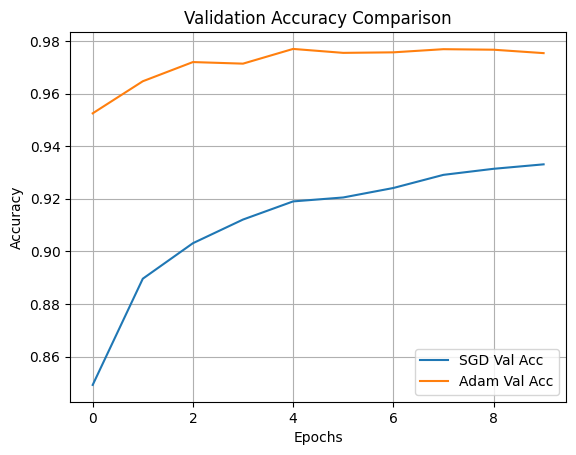

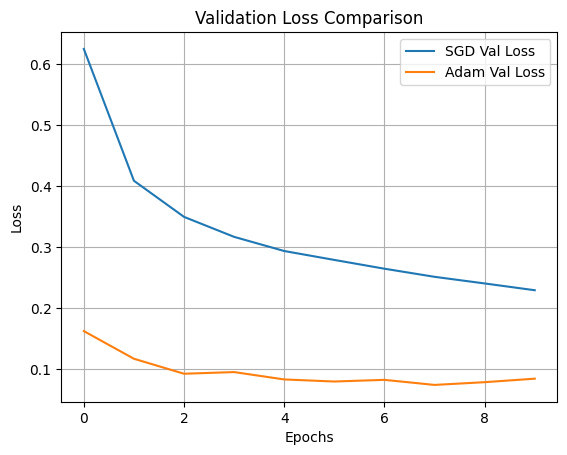

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Function to create the model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate model using given optimizer
def train_with_optimizer(opt_name, optimizer):
    print(f"\nTraining with {opt_name} optimizer")
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train_cat,
                        epochs=10,
                        batch_size=128,
                        validation_data=(x_test, y_test_cat),
                        verbose=0)

    return history

# Train using SGD
sgd_history = train_with_optimizer("SGD", tf.keras.optimizers.SGD(learning_rate=0.01))

# Train using Adam
adam_history = train_with_optimizer("Adam", tf.keras.optimizers.Adam())

# Plot the training and validation accuracy
plt.plot(sgd_history.history['val_accuracy'], label='SGD Val Acc')
plt.plot(adam_history.history['val_accuracy'], label='Adam Val Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation loss
plt.plot(sgd_history.history['val_loss'], label='SGD Val Loss')
plt.plot(adam_history.history['val_loss'], label='Adam Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
